### オイラー法による dy/dx = x のソリューションへの近似プロット

#### 前提知識
この内容をよりよく理解するためには、以下の内容について知っているとよいでしょう。

- 微分方程式を使った現象モデル
- 微分方程式に対する別の視点

微分方程式を用いた現象モデル化の解説では、どのように微分方程式を使って現象をモデル化できるのかを学びました。この時使用された微分方程式はほとんどがシンプルな1階の微分方程式の形をしており、以下のような形でした。

$$
\frac{dy}{dx} = f(x, y) \tag{1}
$$

この式は、左辺に微分係数、右辺に多項式が入っていると捉えることができますが、別の見方をすると、座標平面上の関数 $ f(x, y) $ の値が微分係数として定義された式と見ることもできます。

つまり、すべての $ (x, y) $ の座標に対して傾きが定義されている形と見ることができるのです。

次に、微分係数をすべての座標に適用した結果を得ることができ、これを「方向場」(direction field) または「傾き場」(slope field) と呼びます。

以下の図の例では、次の微分方程式に対する方向場が描かれています。

$$
\frac{dy}{dx} = x \tag{2}
$$











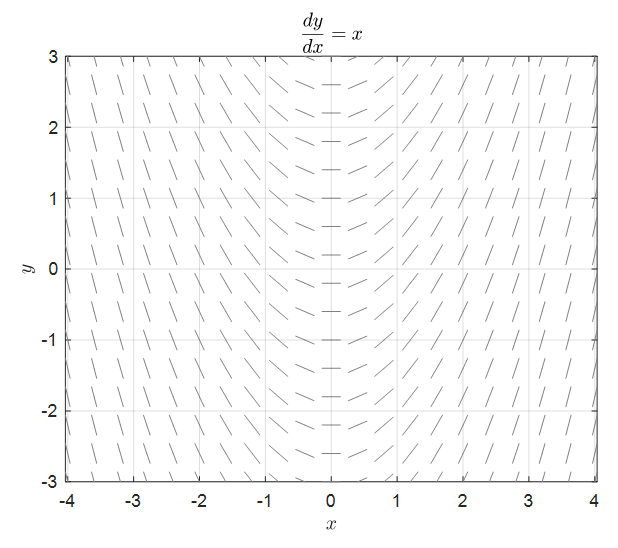

#### 図1. dy/dx = x の方向場


図1からわかるように、dy/dxという微分係数（あるいは傾き）は、xの座標値によって変化します。この単純な微分方程式から得られる式は非常に簡単ですが、方向場の勉強をするには非常によい例です。

では、この方向場を得ることによって微分方程式を解く上でどのような利点があるのでしょうか？ 結局、微分方程式を研究することで得られる最終的な成果は、微分方程式の解（solution）に関連するものであるため、解を求めることに関連する概念であるはずです。

---

### オイラー法を使ったソリューションの求め方

再度、図1で使用した微分方程式 (2) を確認してみましょう。

$$
\frac{dy}{dx} = x \tag{2}
$$

この式の左辺は変化率です。つまり、この微分方程式は、入力された $ x $ の値に応じて関数の瞬間的な変化がどのように異なるかを示しています。

微分方程式で言う「変化」とは一体何でしょうか？

---

### 変化: 次のポイントの関数値との違い

式 (2) に微分係数が含まれているため、式が難しく見えるかもしれませんが、微分係数の定義に立ち返って考えましょう。つまり、$ y = f(x) $ としたとき、

$$
\lim_{h \to 0} \frac{f(x+h) - f(x)}{h} = x \tag{3}
$$

と書き直すことができます。

この式を幾何学的に考えると、次の図2のように考えることができます。

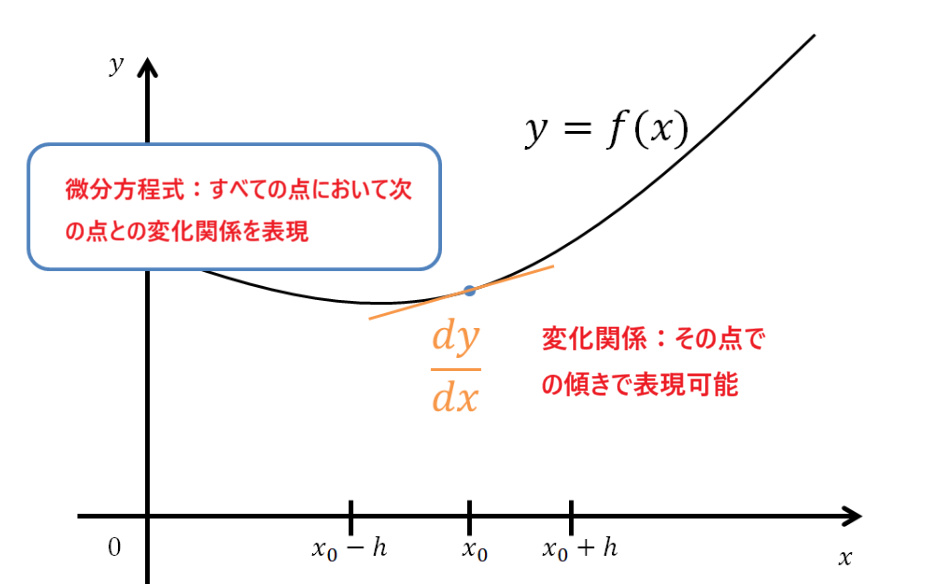

#### 図2. 微分方程式の幾何学的意味



つまり、微分方程式の微分係数を使って、隣接する定義域の値に対する関数を予測することができます。この意味をもう少し掘り下げて考えるために、$ h = 1 $ の場合から値を徐々に小さくしていきましょう。

---

### $ h = 1 $ の場合

式 (3) では、次のように変形されます。

$$
f(x+1) - f(x) = x \tag{4}
$$

$$
f(x+1) = x + f(x) \tag{5}
$$

これは一種の漸化式を意味します。もし $ f(0) = 0 $ という初期条件を設定すれば、次のように $ f(1) $、$ f(2) $、･･･の値を求めることができます。

$$
f(1) = 0 + f(0) = 0 + 0 = 0 \tag{6}
$$

$$
f(2) = 1 + f(1) = 1 + 0 = 1 \tag{7}
$$

$$
f(3) = 2 + f(2) = 2 + 1 = 3 \tag{8}
$$

$$
f(4) = 3 + f(3) = 3 + 3 = 6 \tag{9}
$$

同様にして $ f(-1) $ や $ f(-2) $ の値も求めることができます。

---

続きの内容に関して質問があれば、お知らせください。

### $ h = 1 $ の場合の続き

$ f(-1) $ などの負の値も求めることができます。式 (5) を変形して $ x $ を左辺に移すと、次のように書き直すことができます。

$$
f(x) = f(x+1) - x \tag{10}
$$

この式を使って、例えば $ f(-1) $ を求めると、

$$
f(-1) = f(0) - (-1) = 0 + 1 = 1 \tag{11}
$$

同様に、

$$
f(-2) = f(-1) - (-2) = 1 + 2 = 3 \tag{12}
$$

$$
f(-3) = f(-2) - (-3) = 3 + 3 = 6 \tag{13}
$$

となります。これを表にまとめると次のようになります。

| x | f(x) |
|---|---|
| -3 | 6 |
| -2 | 3 |
| -1 | 1 |
| 0  | 0 |
| 1  | 0 |
| 2  | 1 |
| 3  | 3 |
| 4  | 6 |

この表の値をグラフにすると、次のようになります。

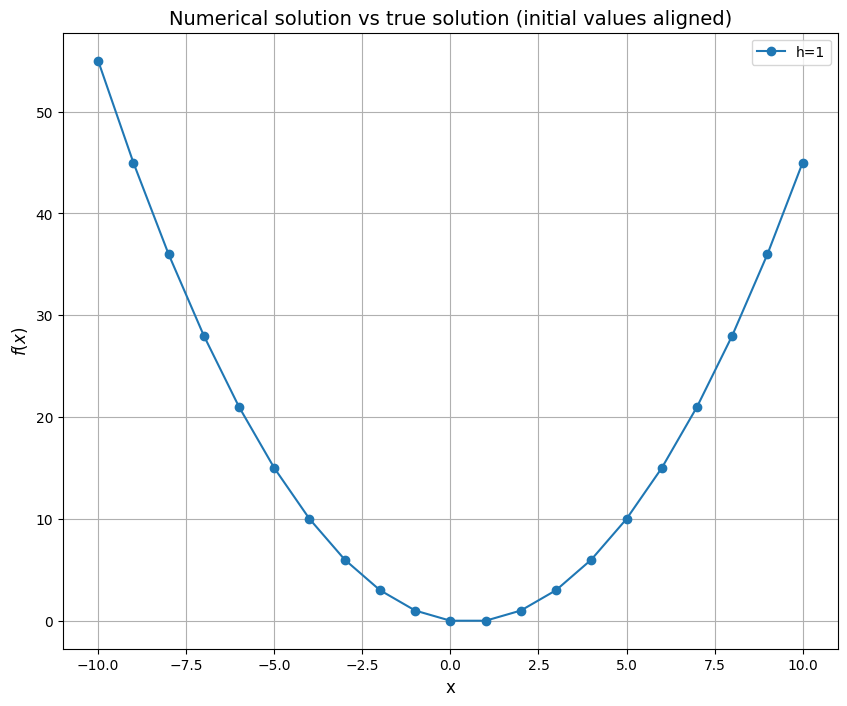

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 真の解を定義 (頂点を原点にする)
def true_solution(x):
    return 0.5*x**2

# 漸化式で解を計算する関数 (初期値を揃える)
def numerical_solution(x, h):
    f = np.zeros_like(x)
    f[0] = 55  # 初期値を f(0) = 55 に揃える
    for i in range(1, len(x)):
        f[i] = f[i-1] + x[i-1] * h
    return f

# xの範囲を設定
x_true = np.linspace(-10, 10, 400)
x_h1 = np.arange(-10, 11, 1)

# 各ステップサイズの数値解を計算
f_h1 = numerical_solution(x_h1, 1)

# 真の解を計算
f_true = true_solution(x_true)

# グラフの描画
plt.figure(figsize=(10, 8))

# h=1 の解をプロット
plt.plot(x_h1, f_h1, 'o-', label='h=1')

# ラベルの設定
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Numerical solution vs true solution (initial values aligned)', fontsize=14)

# 凡例の表示
plt.legend()

# グリッドの表示
plt.grid(True)

# グラフの表示
plt.show()



#### 図3. 式 (5) の漸化式によるソリューションのグラフ

---

### $ h = 0.5 $ の場合

$ h = 0.5 $ の場合、式 (3) は次のように変形されます。

$$
f(x+0.5) - f(x) = 0.5x \tag{14}
$$

$$
f(x+0.5) = 0.5x + f(x) \tag{15}
$$

この漸化式を使い、初期条件 $ f(0) = 0 $ を利用して $ f(0.5) $、$ f(1) $、$ f(1.5) $ などを求めることができます。同様にして、負の値 $ f(-0.5) $ や $ f(-1) $ も求めることができます。これも表にまとめ、グラフにすると次のようになります。



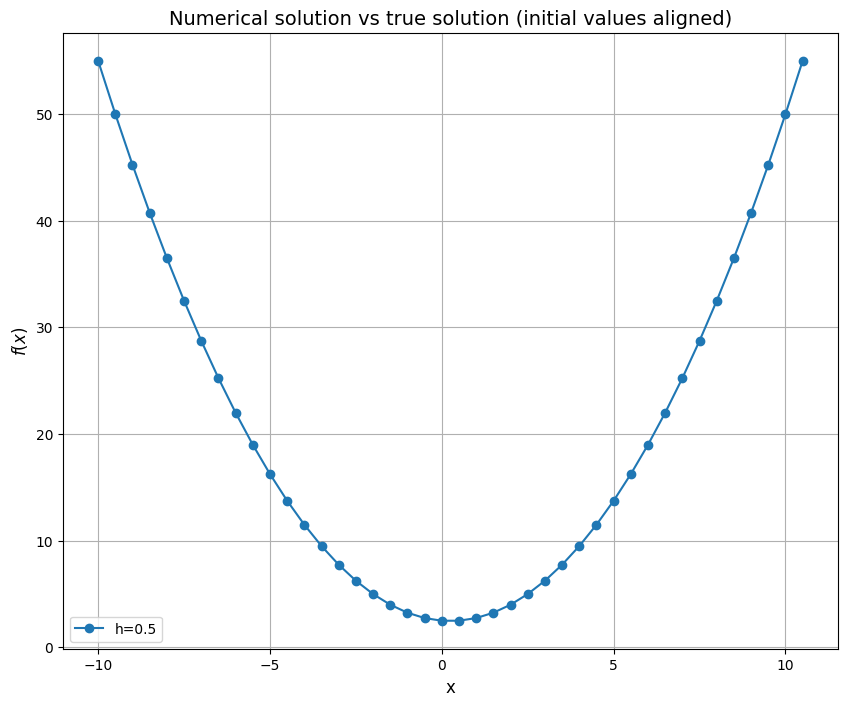

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 真の解を定義 (頂点を原点にする)
def true_solution(x):
    return 0.5*x**2

# 漸化式で解を計算する関数 (初期値を揃える)
def numerical_solution(x, h):
    f = np.zeros_like(x)
    f[0] = 55  # 初期値を f(0) = 55 に揃える
    for i in range(1, len(x)):
        f[i] = f[i-1] + x[i-1] * h
    return f

# xの範囲を設定
x_true = np.linspace(-10, 10, 400)
x_h1 = np.arange(-10, 11, 0.5)

# 各ステップサイズの数値解を計算
f_h1 = numerical_solution(x_h1, 0.5)

# 真の解を計算
f_true = true_solution(x_true)

# グラフの描画
plt.figure(figsize=(10, 8))

# h=0.51 の解をプロット
plt.plot(x_h1, f_h1, 'o-', label='h=0.5')

# ラベルの設定
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Numerical solution vs true solution (initial values aligned)', fontsize=14)

# 凡例の表示
plt.legend()

# グリッドの表示
plt.grid(True)

# グラフの表示
plt.show()



#### 図4. 式 (15) の漸化式によるソリューションのグラフ

---

### $ h = 0.1 $ の場合

$ h = 0.1 $ の場合も同様に、漸化式を次のように変形して求めます。

$$
f(x+0.1) - f(x) = 0.1x \tag{16}
$$

これを使って、同様に初期条件を利用してソリューションを求めます。得られた結果をグラフにすると、次のようになります。



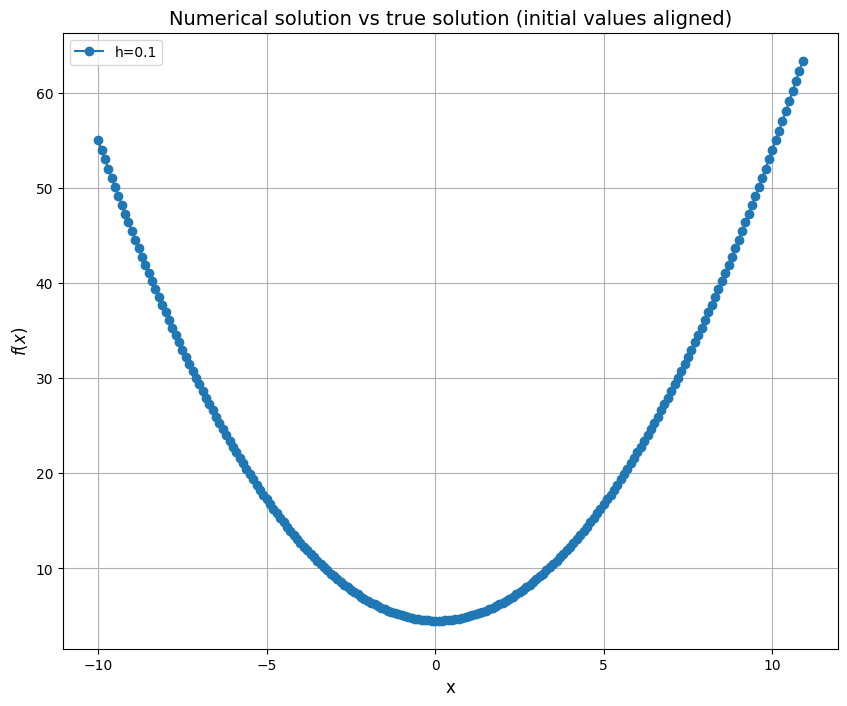

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 真の解を定義 (頂点を原点にする)
def true_solution(x):
    return 0.5*x**2

# 漸化式で解を計算する関数 (初期値を揃える)
def numerical_solution(x, h):
    f = np.zeros_like(x)
    f[0] = 55  # 初期値を f(0) = 55 に揃える
    for i in range(1, len(x)):
        f[i] = f[i-1] + x[i-1] * h
    return f

# xの範囲を設定
x_true = np.linspace(-10, 10, 400)
x_h1 = np.arange(-10, 11, 0.1)

# 各ステップサイズの数値解を計算
f_h1 = numerical_solution(x_h1, 0.1)

# 真の解を計算
f_true = true_solution(x_true)

# グラフの描画
plt.figure(figsize=(10, 8))

# h=1 の解をプロット
plt.plot(x_h1, f_h1, 'o-', label='h=0.1')

# ラベルの設定
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Numerical solution vs true solution (initial values aligned)', fontsize=14)

# 凡例の表示
plt.legend()

# グリッドの表示
plt.grid(True)

# グラフの表示
plt.show()




#### 図5. 式 (16) の漸化式によるソリューションのグラフ


---

### 式 (2) の真のソリューションとの比較

実際、式 (2) は次のように書き換えることができます。

$$
f'(x) = x \tag{17}
$$

この式は両辺を積分し、初期条件 $ f(0) = 0 $ を適用することで、次の結果が得られます。

$$
f(x) = \frac{1}{2}x^2 \tag{18}
$$

つまり、$ f(x) = \frac{1}{2}x^2 $ が式 (2) を満たす真の解であることがわかります。この真の解を先ほどの図2～5の近似解と比較してみましょう。


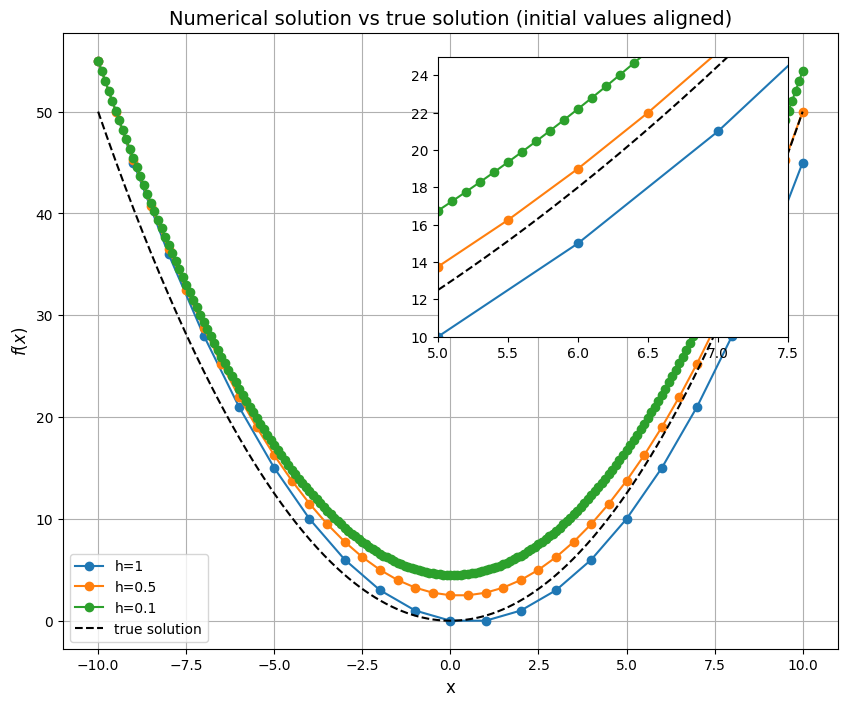

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 真の解を定義 (頂点を原点にする)
def true_solution(x):
    return 0.5*x**2

# 漸化式で解を計算する関数 (初期値を揃える)
def numerical_solution(x, h):
    f = np.zeros_like(x)
    f[0] = 55  # 初期値を f(0) = 55 に揃える
    for i in range(1, len(x)):
        f[i] = f[i-1] + x[i-1] * h
    return f

# xの範囲を設定
x_true = np.linspace(-10, 10, 400)
x_h1 = np.arange(-10, 11, 1)
x_h05 = np.arange(-10, 10.5, 0.5)
x_h01 = np.arange(-10, 10.1, 0.1)

# 各ステップサイズの数値解を計算
f_h1 = numerical_solution(x_h1, 1)
f_h05 = numerical_solution(x_h05, 0.5)
f_h01 = numerical_solution(x_h01, 0.1)

# 真の解を計算
f_true = true_solution(x_true)

# グラフの描画
plt.figure(figsize=(10, 8))

# h=1 の解をプロット
plt.plot(x_h1, f_h1, 'o-', label='h=1')

# h=0.5 の解をプロット
plt.plot(x_h05, f_h05, 'o-', label='h=0.5')

# h=0.1 の解をプロット
plt.plot(x_h01, f_h01, 'o-', label='h=0.1')

# 真の解をプロット
plt.plot(x_true, f_true, 'k--', label='true solution')

# ラベルの設定
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$f(x)$', fontsize=12)
plt.title('Numerical solution vs true solution (initial values aligned)', fontsize=14)

# 凡例の表示
plt.legend()

# グリッドの表示
plt.grid(True)

# ズームインした部分を挿入
plt.axes([0.5, 0.5, 0.35, 0.35])  # 挿入する領域を指定
plt.plot(x_h1, f_h1, 'o-', label='h=1')
plt.plot(x_h05, f_h05, 'o-', label='h=0.5')
plt.plot(x_h01, f_h01, 'o-', label='h=0.1')
plt.plot(x_true, f_true, 'k--', label='true solution')
plt.xlim([5, 7.5])
plt.ylim([10, 25])

# グラフの表示
plt.show()



#### 図6. 漸化式による近似解と真の解の比較



図6を見れば、$ h $ の値が小さくなるほど、漸化式で求めた近似解と真の解がより近い結果を示すことがわかります。

---

### オイラー法のまとめ

上記でステップごとに説明した方法が、オイラー法 (Euler's Method) です。



#### 図7. オイラー法の視覚的説明


オイラー法は、微分方程式を数値的に解くための手法であり、次のいくつかの重要な点を教えてくれます。

1. 微分方程式の解を求めることは、微分方程式を満たす関数 $ f(x) $ を見つけることです。
2. 微分方程式は関数値の変化を示しており、これは現在の点と次の点での関数値の差を意味します。
3. 始点（初期値）さえ特定できれば、微分方程式の変化ルールに従ってソリューションカーブを得ることができます。
4. 現在の点と次の点の間隔（$ h $）が狭いほど、オイラー法で得られた近似解は真の解に近づきます。

---

### 初期値問題

オイラー法は、微分方程式が関数値とその変化に対する関係を説明するという事実に基づいた解法でした。これにより、ある一点から次の定義域の値を推定することができるのです。この非常に基本的な微分方程式の解釈を利用したものがオイラー法です。

次に、微分方程式に含まれている「周囲との関係」は傾きで表すことができます。これは微分係数の幾何学的意味が傾きだからです。

---
### 初期値問題の続き

オイラー法の基本的な考え方は、微分方程式が関数とその変化（微分）との関係を示していることに基づいています。微分方程式が示す「変化のルール」に従って、ある初期値から関数の次の値を数値的に計算していくのがオイラー法の核となる部分です。

初期値問題は、微分方程式とその解を決定するための初期条件が与えられた問題です。初期値問題の例として、以下の形式を考えることができます。

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

ここで、$ y(x_0) = y_0 $ が初期条件です。この初期条件が与えられることで、解は一意に決まります。これをオイラー法を用いて、数値的に解くことが可能です。

---

### 傾き場と解曲線

先に説明したように、微分方程式 $ \frac{dy}{dx} = f(x) $ の各点での「傾き」を表現するために、傾き場や方向場 (direction field) を描画することができます。これにより、解曲線の方向を視覚的に理解しやすくなります。

例えば、以下の微分方程式を考えます。

$$
\frac{dy}{dx} = x \tag{21}
$$

この微分方程式の各点における傾きを示すと、次のような図が得られます。

#### 図8. $ \frac{dy}{dx} = x $ に対する傾き場と、解の1つである $ y = \frac{1}{2}x^2 $


この図に示されている赤い棒は、各 $ (x, y) $ 座標での傾きを表しています。また、図8の紫色の曲線は、解の1つである $ y = \frac{1}{2}x^2 $ です。

図を見ればわかるように、この紫色の曲線は $ y(0) = 0 $ という初期条件に対応した解です。もし異なる初期条件が与えられた場合、得られる解曲線は異なるものになります。


---

### 他の微分方程式に対する傾き場の確認

微分方程式を用いた現象のモデリングでは、他にもいくつかの1階の微分方程式モデルを確認してきました。その中には、指数関数的成長（Exponential growth）やロジスティック成長（Logistic growth）などがありました。それらのモデルに対する傾き場も確認してみましょう。

#### 図9. 指数関数的成長モデルに対する傾き場と、初期値が100のときの解

#### 図10. ロジスティック成長モデルに対する傾き場と、初期値が100のときの解

---

### まとめ

今回のポスティングでは、オイラー法を用いた数値解法の基礎を紹介しました。オイラー法は、微分方程式の解を数値的に近似するための基本的な方法であり、特に次のような点が重要です。

1. 微分方程式の解を求めることは、その微分方程式を満たす関数 $ f(x) $ を見つけることです。
2. 微分方程式は、関数の変化（傾き）に関する情報を提供しており、これに基づいて次の点での関数値を推定できます。
3. オイラー法では、ステップの幅（$ h $）を小さくすることで、数値解は真の解により近づくことが確認できます。
4. 初期条件が異なれば、得られる解の曲線も異なることがわかりました。

---

さらに深掘りして、他の数値解法（例えばルンゲ＝クッタ法）や、微分方程式に関連する別のトピックについて知りたい場合は、お知らせください。
